In 1998, the Adventure Works Cycles company collected a large volume of data about their existing customers, including demographic features and information about purchases they have made. The company is particularly interested in analyzing customer data to determine any apparent relationships between demographic features known about the customers and its Average Monthly spend. Additionally, the analysis endeavored to determine whether a customer's average monthly spend with the company can be predicted from known customer characteristics.


In [47]:
# Importing neccessary packages.
# Import needed packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
import yellowbrick as yb
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Set default fontsize
plt.rcParams['font.size'] = 15

% matplotlib inline
from IPython.display import display # Allows the use of display() for DataFrames
pd.options.display.max_columns = 500 # To avoid truncated outputs
pd.options.display.max_rows = 50 # To avoid truncated outputs

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn =ignore_warn #warnings from sklearn and seaborn

In [48]:
# Importing the datset.
df = pd.read_csv("data/AdvWorksCusts.csv")
spend = pd.read_csv('data/AW_AveMonthSpend.csv')

In [49]:
df.head().T

,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth
MiddleName,V,L,NaN,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales


In [50]:
# Checking the dimension of the dataset
print('The Dimension of the training dataset is : ',df.shape[1],' Columns & ',df.shape[0],' Rows.')

The Dimension of the training dataset is :  23  Columns &  16519  Rows.


In [51]:
# Displaying the Customer Monthly spend and Bike buyers dataset along with their dimensions
display(spend.head().T)
print('The Dimension of the Customer Average Monthly spend dataset is : ',spend.shape[1],' Columns & ',spend.shape[0],' Rows.')

,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
AveMonthSpend,89,117,123,50,95


The Dimension of the Customer Average Monthly spend dataset is :  2  Columns &  16519  Rows.


In [52]:
display(df.isnull().sum())

CustomerID                  0
Title                   16431
FirstName                   0
MiddleName               6985
LastName                    0
Suffix                  16517
AddressLine1                0
AddressLine2            16243
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
dtype: int64

In [53]:
display(spend.isnull().sum())

CustomerID       0
AveMonthSpend    0
dtype: int64

### Missing Value Report 
The Training and test dataset contain missing values in the "title,middlename,suffix,addressline2" columns. This columns are unlikely to affect our analysis and will be ignore for now.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 23 columns):
CustomerID              16519 non-null int64
Title                   88 non-null object
FirstName               16519 non-null object
MiddleName              9534 non-null object
LastName                16519 non-null object
Suffix                  2 non-null object
AddressLine1            16519 non-null object
AddressLine2            276 non-null object
City                    16519 non-null object
StateProvinceName       16519 non-null object
CountryRegionName       16519 non-null object
PostalCode              16519 non-null object
PhoneNumber             16519 non-null object
BirthDate               16519 non-null object
Education               16519 non-null object
Occupation              16519 non-null object
Gender                  16519 non-null object
MaritalStatus           16519 non-null object
HomeOwnerFlag           16519 non-null int64
NumberCarsOwned         16519

In [55]:
df.isnull().sum()

CustomerID                  0
Title                   16431
FirstName                   0
MiddleName               6985
LastName                    0
Suffix                  16517
AddressLine1                0
AddressLine2            16243
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
dtype: int64

In [56]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [57]:
missing_values_table(df)

Your selected dataframe has 23 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Suffix,16517,100.0
Title,16431,99.5
AddressLine2,16243,98.3
MiddleName,6985,42.3


In [58]:
display(spend.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 2 columns):
CustomerID       16519 non-null int64
AveMonthSpend    16519 non-null int64
dtypes: int64(2)
memory usage: 258.1 KB


None

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,16519.0,20234.225195,5342.515987,11000.0,15604.5,20221.0,24860.5,29482.0
HomeOwnerFlag,16519.0,0.673891,0.468802,0.0,0.0,1.0,1.0,1.0
NumberCarsOwned,16519.0,1.500999,1.138962,0.0,1.0,2.0,2.0,4.0
NumberChildrenAtHome,16519.0,0.992009,1.515048,0.0,0.0,0.0,2.0,5.0
TotalChildren,16519.0,2.006235,1.682736,0.0,0.0,2.0,3.0,5.0
YearlyIncome,16519.0,78122.511532,39710.985718,9482.0,47807.5,76120.0,105194.5,196511.0


In [60]:
df.describe(include=['O']).T

,count,unique,top,freq
Title,88,5,Mr.,43
FirstName,16519,662,Isabella,87
MiddleName,9534,44,A,1149
LastName,16519,363,Diaz,191
Suffix,2,1,Jr.,2
AddressLine1,16519,11879,Attaché de Presse,16
AddressLine2,276,154,Verkaufsabteilung,28
City,16519,270,London,379
StateProvinceName,16519,52,California,3973
CountryRegionName,16519,6,United States,6986


In [61]:
spend.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,16519.0,20234.225195,5342.515987,11000.0,15604.5,20221.0,24860.5,29482.0
AveMonthSpend,16519.0,72.405957,27.285370,22.0,52.0,68.0,84.0,176.0


In [62]:
# Joining the Customer information dataset with the bike buyer dataset.
df = pd.merge(df,spend,on='CustomerID',how='inner')
df.head(2)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117


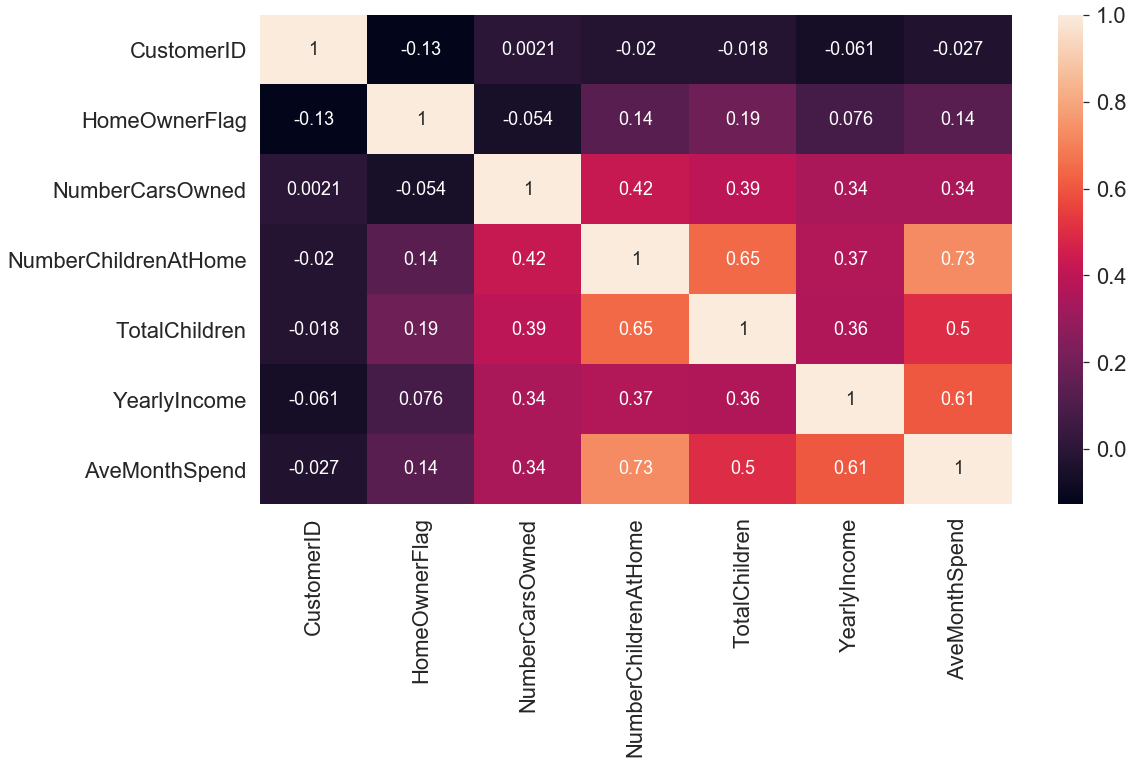

In [63]:
data =  df.corr()
f, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data,
            xticklabels=data.columns.values,
            yticklabels=data.columns.values, annot_kws={'size': 18},annot=True);

In [17]:
# Drop unnecessary columns.
df.columns
needed = ['CountryRegionName', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome',
       'YearlyIncome', 'AveMonthSpend']
df = df[needed].copy()
df.head(2)

,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AveMonthSpend
0,Australia,1966-04-08,Bachelors,Professional,M,M,1,0,0,137947,89
1,Australia,1965-05-14,Bachelors,Professional,M,S,0,1,3,101141,117


In [18]:
# Extract the age of the customers from the BirthDate Column
df["BirthDate"]=pd.to_datetime(df['BirthDate'], infer_datetime_format=True)
df['year']=df['BirthDate'].dt.year
df['Age']=1998-df['year'] # 1998 is the year the dataset was collected.
df = df.drop(['year','BirthDate'],axis=1)
df.head(5).T

,0,1,2,3,4
CountryRegionName,Australia,Australia,Australia,Australia,Australia
Education,Bachelors,Bachelors,Bachelors,Bachelors,Bachelors
Occupation,Professional,Professional,Professional,Professional,Professional
Gender,M,M,M,F,F
MaritalStatus,M,S,M,S,S
HomeOwnerFlag,1,0,1,0,1
NumberCarsOwned,0,1,1,1,4
NumberChildrenAtHome,0,3,3,0,5
YearlyIncome,137947,101141,91945,86688,92771
AveMonthSpend,89,117,123,50,95


In [19]:
df.isnull().sum().T

CountryRegionName       0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
YearlyIncome            0
AveMonthSpend           0
Age                     0
dtype: int64

In [20]:
# Make column Headers lower case
df.columns = df.columns.str.lower()

In [21]:
df['numbercarsowned'].value_counts()

2    5876
1    4424
0    3833
3    1459
4    1157
Name: numbercarsowned, dtype: int64

In [22]:
# Convert some columns with numeric values to categorical variables.
df['numbercarsowned'] = df['numbercarsowned'].replace({0:'no_car',1:'one_car',2:'two_cars',3:'three_cars',4:'four_cars'})
df['numbercarsowned'].value_counts()

two_cars      5876
one_car       4424
no_car        3833
three_cars    1459
four_cars     1157
Name: numbercarsowned, dtype: int64

In [23]:
df['numberchildrenathome'].value_counts()

0    10122
1     2231
2     1476
3     1084
4      970
5      866
Name: numberchildrenathome, dtype: int64

In [24]:
#
df['numberchildrenathome'] = df['numberchildrenathome'].replace({0:'no_child',1:'1_child',2:'2_child',3:'3_child',4:'4_child',5:'5_child'})
df['numberchildrenathome'].value_counts()

no_child    10122
1_child      2231
2_child      1476
3_child      1084
4_child       970
5_child       866
Name: numberchildrenathome, dtype: int64

### Exploratory Data Analysis

In [25]:
def draw_hist(df,col,col_label,bins):
    plt.style.use('fivethirtyeight')
    plt.hist(df[col].dropna(),bins=bins,edgecolor='k');
    plt.xlabel(col_label); plt.ylabel('Frequency');
    plt.title("Frequency Distribution of Customer's "+col_label);    

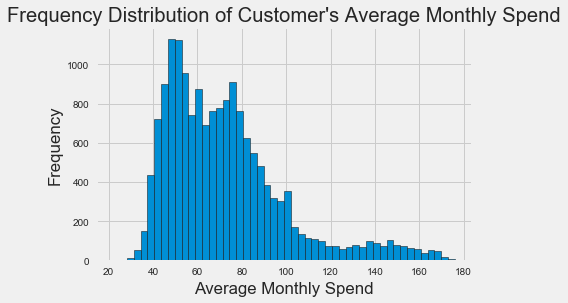

In [26]:
draw_hist(df,'avemonthspend','Average Monthly Spend',50)

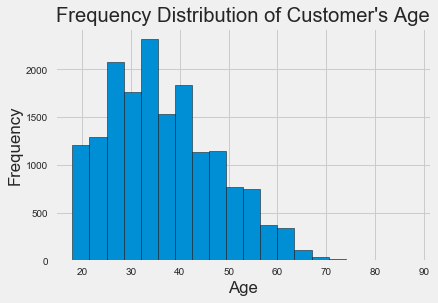

In [27]:
draw_hist(df,'age','Age',20)

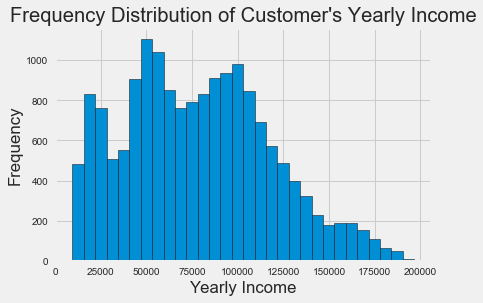

In [28]:
draw_hist(df,'yearlyincome','Yearly Income',30)

In [29]:
# Write a function to do a density plot.
def plot_kde(label_2,df=df,col='avemonthspend',col_1='gender',label_1 ='Average Monthly Spend'):
    values = list(df[col_1].value_counts().index)
    
    for value in values:
        subset = df[df[col_1] == value]
        
        # Instantiate Density Plot
        sns.kdeplot(subset[col].dropna(),label=value, shade= False, alpha=0.8)
    # labeel the plots
    plt.xlabel('Customer '+label_1,size=20); plt.ylabel('Density',size=20)
    plt.title('Density Plot Of Customer ' + label_1 + ' By ' + label_2)
    plt.legend(loc='upper right', fontsize= 12.5)

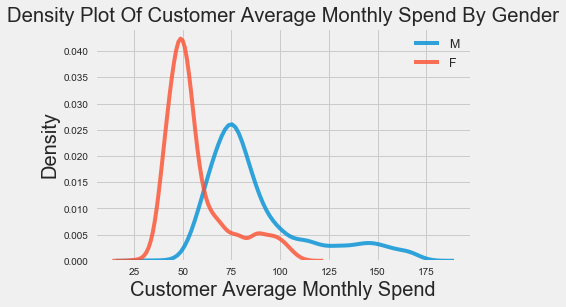

In [30]:
plot_kde('Gender')

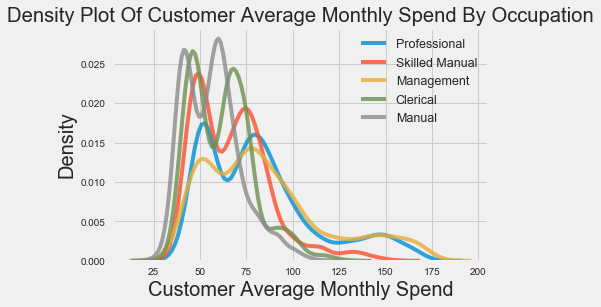

In [31]:
plot_kde('Occupation',col_1='occupation')

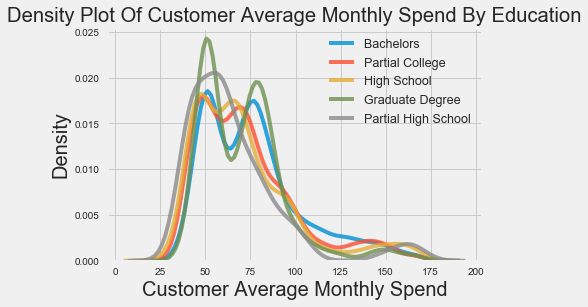

In [32]:
plot_kde('Education',col_1='education')

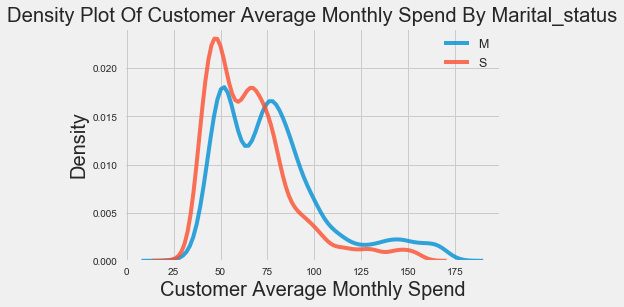

In [33]:
plot_kde('Marital_status',col_1='maritalstatus')

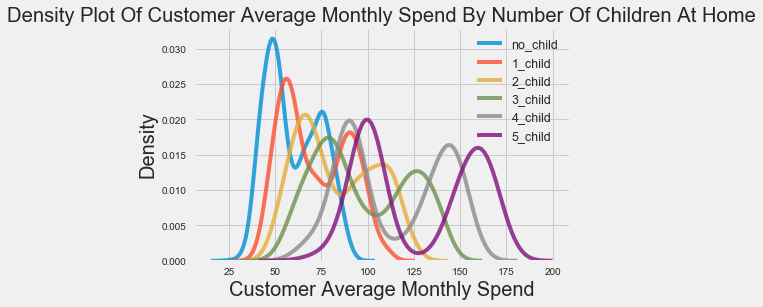

In [34]:
plot_kde('Number Of Children At Home', col_1='numberchildrenathome')

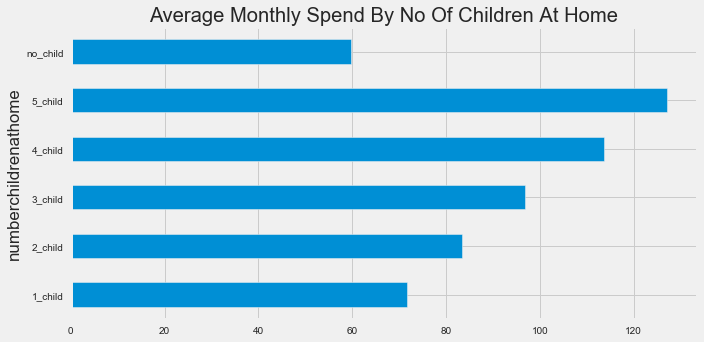

In [35]:
title = 'Average Monthly Spend By No Of Children At Home'
pd.pivot_table(df,values='avemonthspend',index='numberchildrenathome').plot(kind='barh',figsize=(10,5),legend=None,title=title);


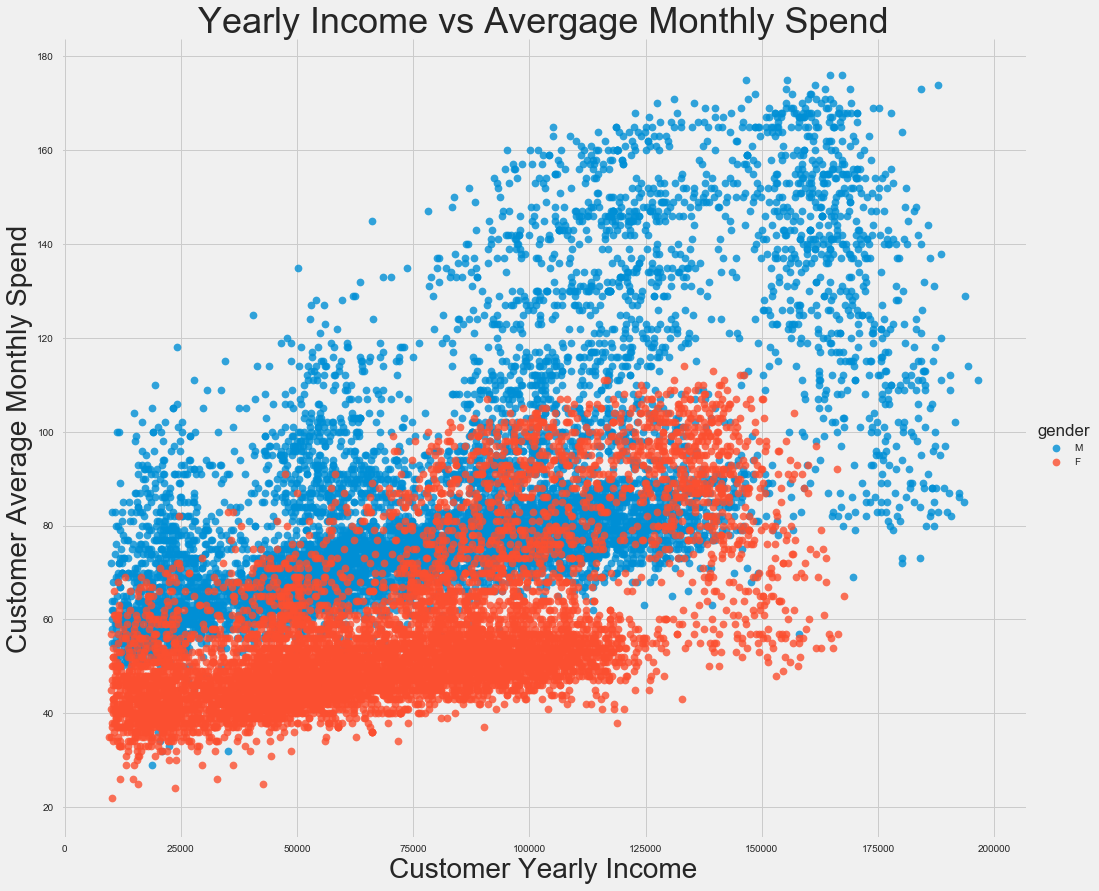

In [36]:
# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('yearlyincome', 'avemonthspend', 
          hue = 'gender', data = df,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Customer Yearly Income", size = 28)
plt.ylabel('Customer Average Monthly Spend', size = 28)
plt.title('Yearly Income vs Avergage Monthly Spend', size = 36);

In [37]:
df['age'] = np.log(df['age'])

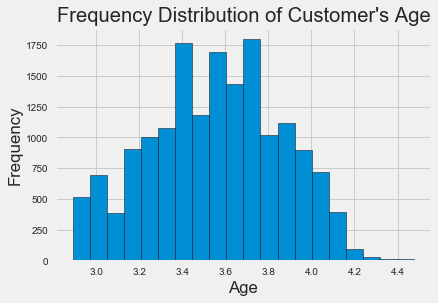

In [38]:
draw_hist(df,'age','Age',20)

In [39]:
df['yearlyincome'] = np.log(df['yearlyincome'])

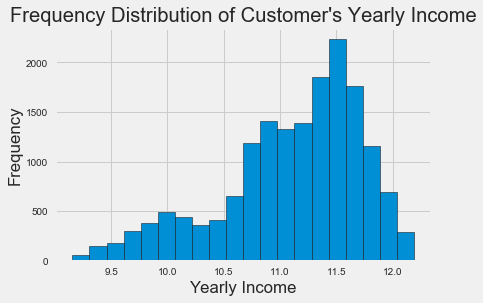

In [40]:
draw_hist(df,'yearlyincome','Yearly Income',20)

In [41]:
df.head()

,countryregionname,education,occupation,gender,maritalstatus,homeownerflag,numbercarsowned,numberchildrenathome,yearlyincome,avemonthspend,age
0,Australia,Bachelors,Professional,M,M,1,no_car,no_child,11.834625,89,3.465736
1,Australia,Bachelors,Professional,M,S,0,one_car,3_child,11.524271,117,3.496508
2,Australia,Bachelors,Professional,M,M,1,one_car,3_child,11.428946,123,3.496508
3,Australia,Bachelors,Professional,F,S,0,one_car,no_child,11.370071,50,3.401197
4,Australia,Bachelors,Professional,F,S,1,four_cars,5_child,11.437889,95,3.401197


In [42]:
df.isnull().sum()

countryregionname       0
education               0
occupation              0
gender                  0
maritalstatus           0
homeownerflag           0
numbercarsowned         0
numberchildrenathome    0
yearlyincome            0
avemonthspend           0
age                     0
dtype: int64

In [43]:
df_l = df['avemonthspend'].copy()
df = df.drop('avemonthspend',axis=1).copy()

num = ['age','yearlyincome','homeownerflag']
df_cat = df.drop(num,axis=1)
df_num = df[num]

In [44]:
df_cat.head(2)

,countryregionname,education,occupation,gender,maritalstatus,numbercarsowned,numberchildrenathome
0,Australia,Bachelors,Professional,M,M,no_car,no_child
1,Australia,Bachelors,Professional,M,S,one_car,3_child


In [45]:
df_num.head(2)

,age,yearlyincome,homeownerflag
0,3.465736,11.834625,1
1,3.496508,11.524271,0


In [46]:
#Build a pipeline for the numerical features transformation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
])

In [47]:
# Build a pipeline for the numerical features transformation
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

cat_pipeline = Pipeline([
        ('one_hot',OneHotEncoder(sparse=False)),
])

In [48]:
# pipeline for transformation of both numeric and categorical data.
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num)
cat_attribs = list(df_cat)

full_pipeline = ColumnTransformer([
        ('num',num_pipeline,num_attribs),
        ('cat',cat_pipeline,cat_attribs),
    ])

df_prepared = full_pipeline.fit_transform(df)

In [49]:
df_prepared.shape

(16749, 34)

In [50]:
df_l.shape

(16749,)

In [51]:
features = df_prepared.copy()
target = df_l.copy()

x,x_test,y,y_test = model_selection.train_test_split(features,target,test_size=0.2,random_state=42)
print(x.shape)
print(x_test.shape)
print(y.shape)
print(y_test.shape)

(13399, 34)
(3350, 34)
(13399,)
(3350,)


In [52]:
seed=1
scoring = 'neg_mean_squared_error'

In [53]:
# Spot check algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVR()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor(n_estimators=100)))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results = model_selection.cross_val_score(model, x,y,cv=kfold,scoring=scoring)
    cv_results = np.sqrt(-cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 6.788374 (0.260165)
LDA: 5.538968 (0.246278)
KNN: 6.136257 (0.230459)
CART: 4.438214 (0.075958)
NB: 26.284383 (0.885012)
SVM: 6.519139 (0.288288)
GBR: 3.360133 (0.039045)
RFR: 3.412821 (0.061718)


In [54]:
results


[array([7.07588806, 7.23651095, 6.87783337, 6.64826281, 6.71759778,
        6.80380525, 6.73873564, 6.43400038, 6.99725488, 6.35385349]),
 array([5.56923854, 5.86985723, 5.60490191, 5.09301541, 5.35026851,
        5.65698617, 5.81846007, 5.16402597, 5.69295191, 5.56997713]),
 array([6.35185482, 5.88234647, 5.94731847, 6.46636533, 6.21048223,
        6.35627789, 6.08407513, 6.28515189, 5.69601589, 6.08268395]),
 array([4.30948278, 4.54586904, 4.48280296, 4.4876281 , 4.49309171,
        4.43116928, 4.30904983, 4.38214236, 4.46213338, 4.4787691 ]),
 array([25.40836623, 24.34130756, 26.16775673, 26.28782988, 26.78603724,
        27.13268943, 27.13185053, 26.85162381, 25.57742125, 27.15895181]),
 array([6.78646229, 7.03779703, 6.37107532, 6.52401247, 6.45964176,
        6.53553834, 6.33118015, 6.13788018, 6.8805482 , 6.12725863]),
 array([3.34219403, 3.36092436, 3.38167503, 3.4084403 , 3.35933647,
        3.36331039, 3.32119166, 3.42314577, 3.36235228, 3.27875636]),
 array([3.32712066, 3.42

In [55]:
# Extract the feature importances into a dataframe
model_df = pd.DataFrame({'Logistic Regression':results[0], 
                        'Linear Discriminant Analysis':results[1],
                        'K-Nearest Neighbor':results[2],
                        'Decision Tree':results[3],
                        'GaussianNB': results[4],
                         'Support Vector Machine': results[5],
                         'Gradient Boasting': results[6],
                         'Random Forest': results[7]
                        })

model_df

,Decision Tree,GaussianNB,Gradient Boasting,K-Nearest Neighbor,Linear Discriminant Analysis,Logistic Regression,Random Forest,Support Vector Machine
0,4.309483,25.408366,3.342194,6.351855,5.569239,7.075888,3.327121,6.786462
1,4.545869,24.341308,3.360924,5.882346,5.869857,7.236511,3.424202,7.037797
2,4.482803,26.167757,3.381675,5.947318,5.604902,6.877833,3.472085,6.371075
3,4.487628,26.287830,3.408440,6.466365,5.093015,6.648263,3.495943,6.524012
4,4.493092,26.786037,3.359336,6.210482,5.350269,6.717598,3.433156,6.459642
5,4.431169,27.132689,3.363310,6.356278,5.656986,6.803805,3.446578,6.535538
6,4.309050,27.131851,3.321192,6.084075,5.818460,6.738736,3.379156,6.331180
7,4.382142,26.851624,3.423146,6.285152,5.164026,6.434000,3.465975,6.137880
8,4.462133,25.577421,3.362352,5.696016,5.692952,6.997255,3.390233,6.880548
9,4.478769,27.158952,3.278756,6.082684,5.569977,6.353853,3.293766,6.127259


In [56]:
model_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Decision Tree,10.0,4.438214,0.080067,4.309050,4.394399,4.470451,4.486422,4.545869
GaussianNB,10.0,26.284383,0.932885,24.341308,25.725005,26.536934,27.061794,27.158952
Gradient Boasting,10.0,3.360133,0.041157,3.278756,3.346480,3.361638,3.377084,3.423146
K-Nearest Neighbor,10.0,6.136257,0.242926,5.696016,5.981160,6.147279,6.335179,6.466365
Linear Discriminant Analysis,10.0,5.538968,0.259600,5.093015,5.405011,5.587440,5.683960,5.869857
Logistic Regression,10.0,6.788374,0.274238,6.353853,6.665597,6.771270,6.967400,7.236511
Random Forest,10.0,3.412821,0.065057,3.293766,3.381925,3.428679,3.461126,3.495943
Support Vector Machine,10.0,6.519139,0.303882,6.127259,6.341154,6.491827,6.723731,7.037797


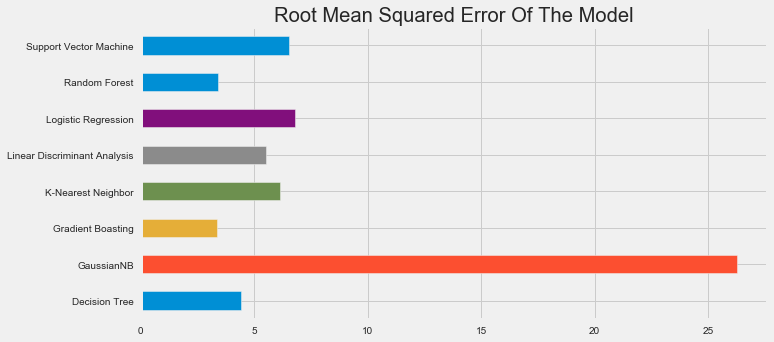

In [57]:
# Visualizing different Model Accuracy 
model_df.mean().plot(kind='barh',title='Root Mean Squared Error Of The Model',figsize=(10,5));

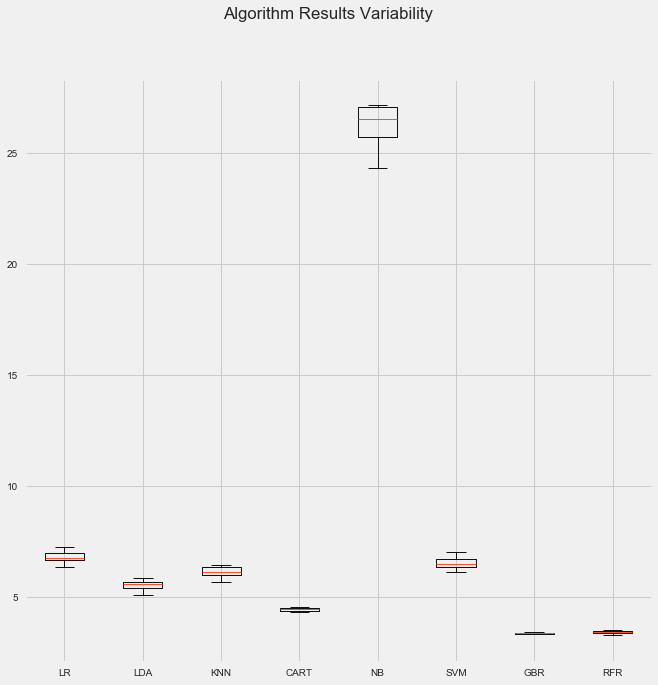

In [58]:
 # Compare Algorithms
fig = plt.figure(figsize=(10.0,10.0))
fig.suptitle('Algorithm Results Variability')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

### Optimizing Model

In [59]:
from sklearn.metrics import mean_squared_error

# Using our best model on the test set.
gbr_model = GradientBoostingRegressor(random_state=60)

# Fit Model to training set.
gbr_model.fit(x,y)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=60, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [60]:
# use model to make prediction
predictions = gbr_model.predict(x_test)

# mean squared Error
gbr_mse = mean_squared_error(y_test,predictions)
gbr_rmse = np.sqrt(gbr_mse)
gbr_rmse

3.3321192594642

In [61]:
# Number of trees used in random forest
n_estimators = [10,20,50,100,150,200]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]


# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [62]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state=42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [63]:
# Fit on the training data
random_cv.fit(x, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 19.5min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 50, 100, 150, 200], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [64]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [65]:
default_model = gbr_model
best_model = random_cv.best_estimator_


In [66]:
%%timeit -n 1 -r 5
default_model.fit(x, y)

8.59 s ± 474 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [67]:
%%timeit -n 1 -r 5
best_model.fit(x, y)

29.5 s ± 2.71 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [68]:
default_pred_test = default_model.predict(x_test)
best_pred_test = best_model.predict(x_test)

default_pred_train = default_model.predict(x)
best_pred_train = best_model.predict(x)

default_mse_test = mean_squared_error(y_test, default_pred_test)
best_mse_test = mean_squared_error(y_test, best_pred_test)

default_mse_train = mean_squared_error(y, default_pred_train)
best_mse_train = mean_squared_error(y, best_pred_train)


print('Default model performance on the train set: RMSE = %0.4f.' % np.sqrt(default_mse_train))
print('Best model performance on the train set:   RMSE = %0.4f.' % np.sqrt(best_mse_train))

print('Default model performance on the test set: RMSE = %0.4f.' % np.sqrt(default_mse_test))
print('Best model performance on the test set:   RMSE = %0.4f.' % np.sqrt(best_mse_test))

Default model performance on the train set: RMSE = 3.2449.
Best model performance on the train set:   RMSE = 2.7645.
Default model performance on the test set: RMSE = 3.3321.
Best model performance on the test set:   RMSE = 3.1660.


In [69]:
df_test_rm = np.sqrt(default_mse_test)
df_train_rm = np.sqrt(default_mse_train)

fin_test_rm = np.sqrt(best_mse_test)
fin_train_rm = np.sqrt(best_mse_train)


model_perf_comp = pd.DataFrame({'Default Model':[df_train_rm,df_test_rm],'Final_Model':[fin_train_rm,fin_test_rm]}, index = ['Train','Test'])
model_perf_comp.T

,Train,Test
Default Model,3.244877,3.332119
Final_Model,2.764482,3.165974


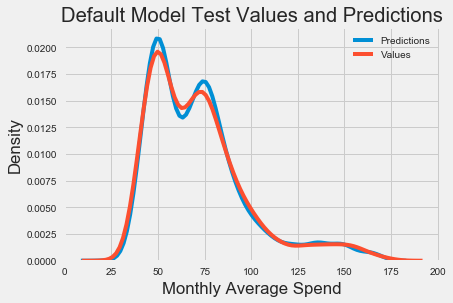

In [70]:
# Density plot of the final predictions and the test values
sns.kdeplot(default_pred_test, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Monthly Average Spend'); plt.ylabel('Density');
plt.title('Default Model Test Values and Predictions');

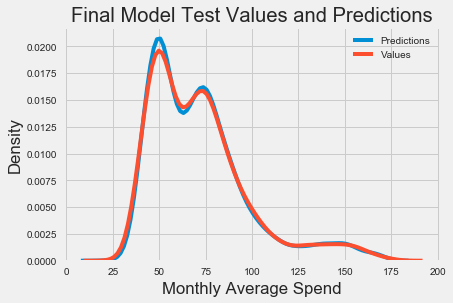

In [71]:
# Density plot of the final predictions and the test values
sns.kdeplot(best_pred_test, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Monthly Average Spend'); plt.ylabel('Density');
plt.title('Final Model Test Values and Predictions');

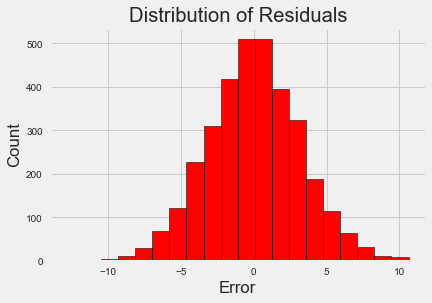

In [73]:
figsize = (6, 6)

# Calculate the residuals 
residuals = best_pred_test - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');